## MC integration exercise

Here we will use MC integration to find the area under a curve. The curve in question may look arbitrary but in fact roughly follows the invariant mass distribution of b-mesons decaying to a charm meson and a kaon (or pion) at the LHC in units of GeV. The area under different components of the curve can be converted to the number of signal/background events observed but here we will only consider the entire curve as given. 

1. Plot the function `data_shape` using the list `params` as given for 10,000 events between 4.0 GeV and 6.0 GeV.

2. By considering a 2D box spanning `x_low=4.0, x_high=6.0` and `y_low=0.0, y_high=Z` find the area under the curve. You need to first determine an appropriate value of `Z`, for instance by visual inspection.

* Write a function called `integrate` that takes arguments `(x_low, x_high, y_low, y_high, num_mc_evts)` where `num_mc_evts` is the number of MC events used for the integration. The function should return the area under the curve in squared units of those of `x` and `y`. It will be used in the hidden test.


3. To see how the determination of the area depends on the number of MC integration events, plot the value of the area obtained using 100 to 1,000,000 integration events in 200 steps. For clarity, use a logarithmic x-axis.

* Remember to give your axes labels



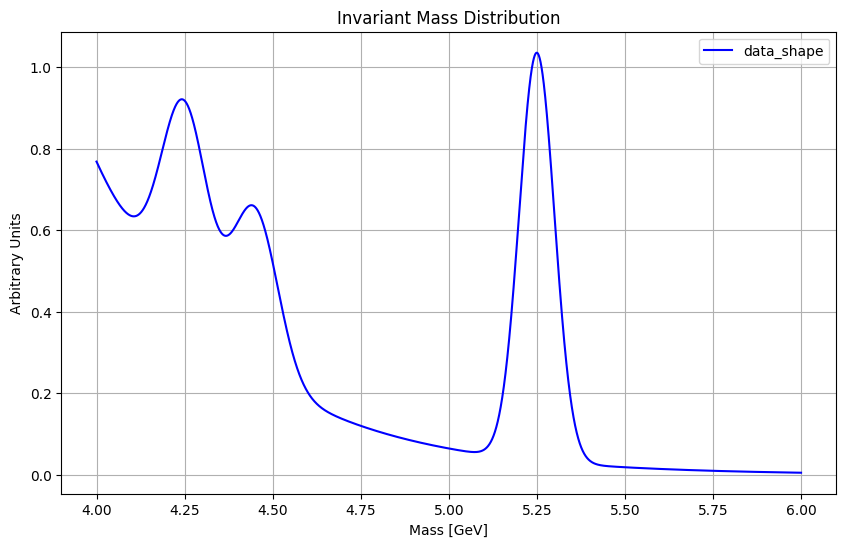

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mean, amplitude, sigma):
    """
    Calculate the Gaussian function.

    Parameters:
    x (array-like): Input array of x values.
    mean (float): Mean of the Gaussian distribution.
    amplitude (float): Amplitude of the Gaussian peak.
    sigma (float): Standard deviation of the Gaussian distribution.

    Returns:
    numpy.ndarray: Gaussian function values corresponding to the input x values.
    """
    return amplitude * np.exp(- (x - mean)**2 / (2 * sigma ** 2))

def exp_bkg(x, amplitude, b):
    """
    Calculate the exponential background function.

    Parameters:
    x (array-like): Input array of x values.
    amplitude (float): Amplitude of the exponential function.
    b (float): Exponential decay constant.

    Returns:
    numpy.ndarray: Exponential function values corresponding to the input x values.
    """
    return amplitude * np.exp(-b * x)

def data_shape(x, mean1, mean2, amp1, sigma1, sigma2, amp2, b):
    """
    Combine Gaussian and exponential functions to mimic b-meson invariant mass distribution.

    Parameters:
    x (array-like): Input array of x values.
    mean1 (float): Mean of the first Gaussian peak.
    mean2 (float): Mean of the second Gaussian peak.
    amp1 (float): Amplitude of the first Gaussian peak.
    sigma1 (float): Standard deviation of the first Gaussian peak.
    sigma2 (float): Standard deviation of the second Gaussian peak.
    amp2 (float): Amplitude of the exponential background.
    b (float): Exponential decay constant.

    Returns:
    numpy.ndarray: Combined function values corresponding to the input x values.
    """
    g1 = gaussian(x, mean1, amp1, sigma1)
    g2 = gaussian(x, mean2, amp1 * 0.5, sigma2)
    g3 = gaussian(x, mean2 + 0.2, amp1 * 0.4, sigma2)
    b1 = exp_bkg(x, amp2, b)
    return g1 + g2 + g3 + b1

params = [5.25, 4.25, 1., 0.05, 0.065, 1.5e4, 2.47]

# Solution to 1.
# YOUR CODE HERE
x = np.linspace(4.0,6.0,10000)
y = data_shape(x,*params)

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue', label='data_shape')
plt.title("Invariant Mass Distribution")
plt.xlabel("Mass [GeV]")
plt.ylabel("Arbitrary Units")
plt.legend()
plt.grid(True)
plt.show()

1.0350336265573998


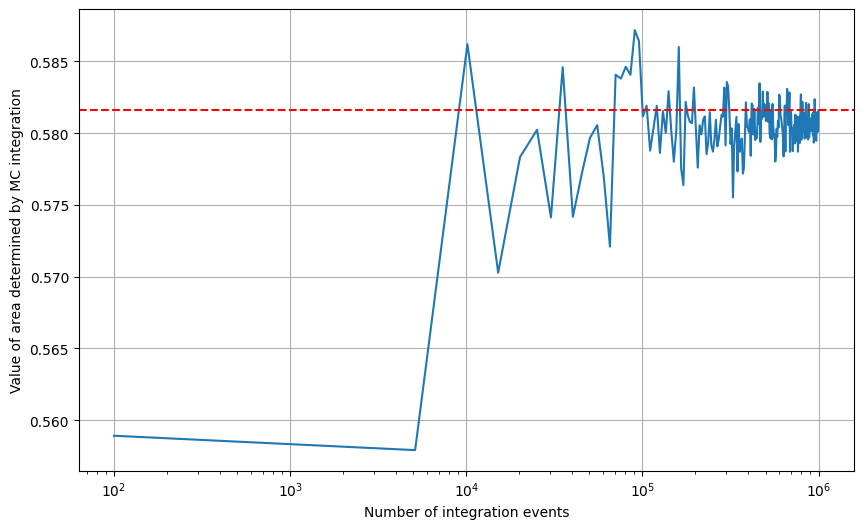

In [3]:
#Solution to 2. and 3.
# YOUR CODE HERE

# Question 2
Z = np.max(y)
y_high = Z
print(Z)

def integrate(x_low, x_high, y_low, y_high, num_mc_evts):
    rand_x=np.random.uniform(x_low, x_high, num_mc_evts)
    rand_y=np.random.uniform(y_low, y_high, num_mc_evts)
    y_curve = data_shape(rand_x, *params)
    accepted_points = len(np.where(rand_y < y_curve)[0])
    box_area = (x_high - x_low) * (y_high - y_low)
    area_under_curve = box_area * (accepted_points / num_mc_evts)
    return area_under_curve

    
# Question 3 
num_integ_events=np.linspace(100, 1000000, 200, dtype = int)
values=[]
for num in num_integ_events:
    area=integrate(4,6,0,Z,num)
    values.append(area)

values=np.array(values)

plt.figure(figsize=(10, 6))
plt.plot(num_integ_events, values)
plt.grid()
plt.xscale('log')
plt.xlabel("Number of integration events")
plt.ylabel("Value of area determined by MC integration")
plt.axhline(values[-1], color='red', linestyle='--', label='Asymptotic value')
plt.show()